In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Basic Imports

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/ml lab 5/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/ml lab 5/test.csv')

In [42]:
train.head()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Hear

In [44]:
train.describe()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,54.136706,0.714735,3.312752,130.497433,245.011814,0.079987,0.981660,152.816763,0.273725,0.716028,1.455871,0.451040,4.618873
std,181865.479132,8.256301,0.451541,0.851615,14.975802,33.681581,0.271274,0.998783,19.112927,0.445870,0.948472,0.545192,0.798549,1.950007
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,157499.750000,48.000000,0.000000,3.000000,120.000000,223.000000,0.000000,0.000000,142.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,314999.500000,54.000000,1.000000,4.000000,130.000000,243.000000,0.000000,0.000000,157.000000,0.000000,0.100000,1.000000,0.000000,3.000000
75%,472499.250000,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,166.000000,1.000000,1.400000,2.000000,1.000000,7.000000
max,629999.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [45]:
test.columns

Index(['id', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium'],
      dtype='object')

Data Visualization

/tmp/ipython-input-1360540597.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='Heart Disease', palette='viridis', ax=axes[0])


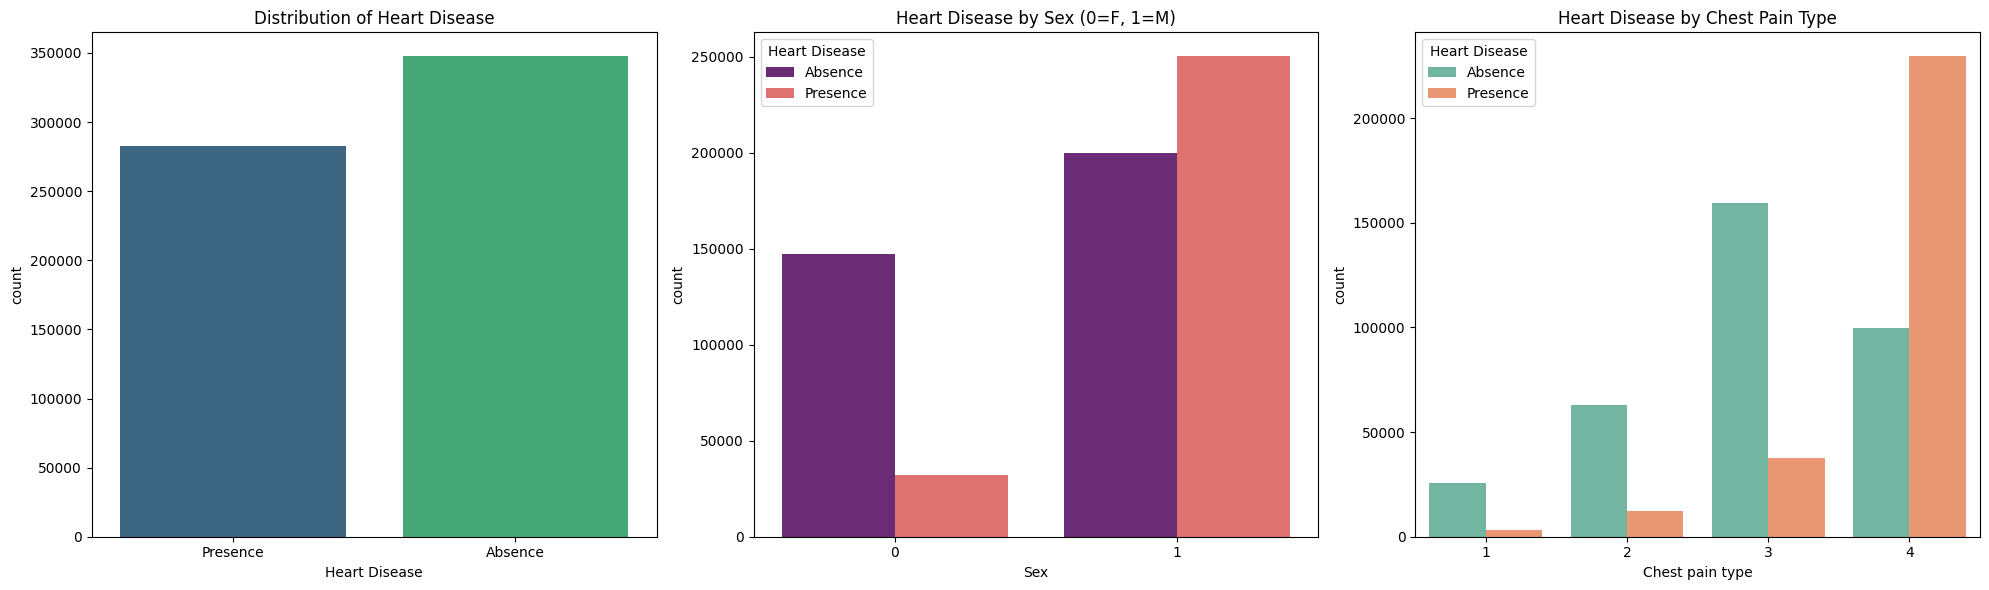

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.countplot(data=train, x='Heart Disease', palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Heart Disease')

# Sex vs Target:
sns.countplot(data=train, x='Sex', hue='Heart Disease', palette='magma', ax=axes[1])
axes[1].set_title('Heart Disease by Sex (0=F, 1=M)')

# Chest Pain Impact:
sns.countplot(data=train, x='Chest pain type', hue='Heart Disease', palette='Set2', ax=axes[2])
axes[2].set_title('Heart Disease by Chest Pain Type')

plt.tight_layout()
plt.show()

Importing Models


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier,early_stopping, log_evaluation
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

In [48]:
train['Heart Disease'] = train['Heart Disease'].map({'Absence': 0, 'Presence': 1})

In [49]:
test_id=test['id']

In [50]:
X = train.drop(['id','Heart Disease'],axis=1)
y = train['Heart Disease']
test=test.drop(['id'],axis=1)

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

Defining params of models

In [53]:
cat_params= {'random_strength': 2,
         'learning_rate': 0.05,
         'l2_leaf_reg': 1,
         'iterations': 1800,
         'grow_policy': 'SymmetricTree',
         'depth': 4, 'border_count': 128,
         'bagging_temperature': 0.2,
         'task_type':'GPU',
         'devices':'0'
        }

In [54]:
lgbm_params={
    'reg_lambda':0.5,
    'reg_alpha':0.5,
    'num_leaves':63,
    'n_estimators': 1000,
    'min_child_samples': 100,
    'max_depth': 8,
    'learning_rate': 0.02,
    'colsample_bytree': 0.8,
    'random_state':42,
    "device": "gpu",
    "gpu_platform_id": 0,
    "gpu_device_id": 0,
    'verbose':-1 }

In [55]:
xgb_params = {
    'n_estimators': 1000,
    'max_depth': 8,
    'learning_rate': 0.02,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.5,
    'reg_lambda': 0.5,
    'random_state': 42,
    'device': 'cuda',
    'eval_metric': 'auc',
    'verbosity': 0
}

CatBoost evaluation :-

In [56]:
cat_model=CatBoostClassifier(**cat_params,
                         eval_metric='AUC',
                         random_state=42,verbose=200,cat_features=cat_cols)

In [57]:
cat_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=50
)

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.9196409	best: 0.9196409 (0)	total: 11.7ms	remaining: 21.1s
200:	test: 0.9540849	best: 0.9540849 (200)	total: 1.52s	remaining: 12.1s
400:	test: 0.9545940	best: 0.9545940 (400)	total: 2.9s	remaining: 10.1s
600:	test: 0.9550028	best: 0.9550028 (600)	total: 4.63s	remaining: 9.24s
800:	test: 0.9552106	best: 0.9552108 (799)	total: 8.72s	remaining: 10.9s
1000:	test: 0.9553005	best: 0.9553005 (1000)	total: 10.1s	remaining: 8.04s
1200:	test: 0.9553431	best: 0.9553443 (1184)	total: 11.4s	remaining: 5.7s
1400:	test: 0.9553728	best: 0.9553730 (1397)	total: 12.8s	remaining: 3.65s
1600:	test: 0.9554030	best: 0.9554034 (1590)	total: 14.2s	remaining: 1.76s
1799:	test: 0.9554220	best: 0.9554223 (1790)	total: 15.6s	remaining: 0us
bestTest = 0.9554222822
bestIteration = 1790
Shrink model to first 1791 iterations.


In [58]:
cat_y_probs = cat_model.predict_proba(X_test)[:, 1]

In [59]:
cat_log_loss = log_loss(y_test, cat_y_probs)

In [60]:
auc_score = roc_auc_score(y_test, cat_y_probs)

print(f"--- CatBoost Model Performance ---")
print(f"ROC-AUC Score: {auc_score:.5f}")
print(f"Log Loss: {cat_log_loss:.5f}")

--- CatBoost Model Performance ---
ROC-AUC Score: 0.95542
Log Loss: 0.26780


In [61]:
cat_final_preds = cat_model.predict_proba(test)[:, 1]

LGBM evaluation :-

In [62]:
lgbm_model=LGBMClassifier(**lgbm_params)

In [63]:
lgbm_model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    eval_metric='auc',
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=100)
    ]
)

Training until validation scores don't improve for 50 rounds
[100]	valid_0's auc: 0.951948	valid_0's binary_logloss: 0.311679
[200]	valid_0's auc: 0.953504	valid_0's binary_logloss: 0.277551
[300]	valid_0's auc: 0.954256	valid_0's binary_logloss: 0.272139
[400]	valid_0's auc: 0.954637	valid_0's binary_logloss: 0.270523
[500]	valid_0's auc: 0.954866	valid_0's binary_logloss: 0.269729
[600]	valid_0's auc: 0.955001	valid_0's binary_logloss: 0.269293
[700]	valid_0's auc: 0.955083	valid_0's binary_logloss: 0.269032
[800]	valid_0's auc: 0.95513	valid_0's binary_logloss: 0.268887
[900]	valid_0's auc: 0.955147	valid_0's binary_logloss: 0.268827
Early stopping, best iteration is:
[880]	valid_0's auc: 0.95515	valid_0's binary_logloss: 0.268821


LGBMClassifier(colsample_bytree=0.8, device='gpu', gpu_device_id=0,
               gpu_platform_id=0, learning_rate=0.02, max_depth=8,
               min_child_samples=100, n_estimators=1000, num_leaves=63,
               random_state=42, reg_alpha=0.5, reg_lambda=0.5, verbose=-1)

In [64]:
lgbm_y_probs = lgbm_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, lgbm_y_probs)

In [65]:
lgbm_log_loss = log_loss(y_test, lgbm_y_probs)

In [66]:
print(f"--- LGBM Model Performance ---")
print(f"ROC-AUC Score: {auc_score:.5f}")
print(f"Log Loss: {lgbm_log_loss:.5f}")

--- LGBM Model Performance ---
ROC-AUC Score: 0.95515
Log Loss: 0.26882


In [67]:
lgbm_final_preds = lgbm_model.predict_proba(test)[:, 1]

XGBoost evaluation :-

In [68]:
xgb_model = XGBClassifier(**xgb_params)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.02, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

In [69]:
xgb_y_probs = xgb_model.predict_proba(X_test)[:, 1]
xgb_auc_score = roc_auc_score(y_test, xgb_y_probs)

In [70]:
xgb_log_loss = log_loss(y_test, xgb_y_probs)

In [71]:
print(f"--- XGBoost Model Performance ---")
print(f"ROC-AUC Score: {xgb_auc_score:.5f}")
print(f"Log Loss: {xgb_log_loss:.5f}")

--- XGBoost Model Performance ---
ROC-AUC Score: 0.95494
Log Loss: 0.26935


In [72]:
xgb_final_preds = xgb_model.predict_proba(test)[:, 1]

Ensembling/Blending to improve generalization

In [73]:
final_preds = (cat_final_preds * 0.40) + (lgbm_final_preds * 0.30) + (xgb_final_preds * 0.30)

In [74]:
submission = pd.DataFrame({
    "id": test_id,
    "Heart Disease": final_preds
})

submission.to_csv('submission.csv', index=False)